In [1]:
from collections import defaultdict
import os
import csv
import dateutil.parser
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
def reader(directory= "./data/"):
    listOfLists = []
    for f in os.listdir(directory):
        if f.endswith(".txt"):
            f = directory + f
            with open(f, "rb") as csvfile:
                
                #SKIP HEADER ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS     ']
                next(csvfile)
                for line in csvfile:
                    listOfLists.append(line.split(","))
    
    #Remove excess space and \n from last item
    for item in listOfLists[0:80000]:
        item[-1] = item[-1][0:10]
                    
                    

    return listOfLists[0:80000]
    print listOfLists


reader()

[['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/12/2015',
  '00:00:00',
  'REGULAR',
  '0005306695',
  '0001793990'],
 ['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/12/2015',
  '04:00:00',
  'REGULAR',
  '0005306724',
  '0001793992'],
 ['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/12/2015',
  '08:00:00',
  'REGULAR',
  '0005306743',
  '0001794019'],
 ['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/12/2015',
  '12:00:00',
  'REGULAR',
  '0005306843',
  '0001794114'],
 ['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/12/2015',
  '16:00:00',
  'REGULAR',
  '0005307067',
  '0001794160'],
 ['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/12/2015',
  '20:00:00',
  'REGULAR',
  '0005307400',
  '0001794207'],
 ['A002',
  'R051',
  '02-00-00',
  'LEXINGTON AVE',
  'NQR456',
  'BMT',
  '09/13/2015',
  '00:00:0

**CHALLENGE 1**

In [30]:
def ConvertRawDataToDict(inlist):
    d = defaultdict(list)
    #d = {}
    
    for row in inlist:
        key = tuple(row[0:4])
        vals = row[4:]

        if key in d:
            d[key].append(vals)
        else:
            valsRow = list(vals)
            d[key] = [valsRow]
            
    return d

d = ConvertRawDataToDict(reader())
print len(d)


1856


**CHALLENGE 2**

In [31]:
def timesDict(dictionary):
    
    newDict = defaultdict()
    
    for key, value in dictionary.items():
        newDict[key] = []
        
               
        for row in value: 
            #for each key, make date time into one string        
            dateStr = row[2] + " " + row[3]
            
            #use dateutil to convert date time
            daTime = dateutil.parser.parse(dateStr)
            
            
            #convert entries to integer to get rid of leading 0's
            entryInt = int(row[5])
            
            
            #creates list of lists with DaTime, Entry count
            newDataRow = []
            newDataRow.append(daTime)
            newDataRow.append(entryInt)
            
            newDict[key].append(newDataRow)
        
    for k, val in newDict.items():
        
        #sort date
        val = sorted(val, key = lambda x: x[0])
        
        #subtract previous count from recent count
        for i, row in enumerate(val):
            if i == 0:
                row.append(0)
            else:
                row.append(val[i][1] - val[i-1][1])
        
        #remove old count value
        for item in val:
            item.pop(-2)
    return newDict
        
    
d =  timesDict(d)

# for key,value in d.items()


**CHALLENGE 3**

In [32]:
#n = 4, data comes every 4 hours
#OBJECTIVE: same keys, single count for single day

def perDay(d):
    bydayDict = defaultdict()
    
    for key, val in d.items():
        
        
        bydayDict[key] = []
        
        bydayDate = ""
        
        count = 0
        for index, ls in enumerate(sorted(val)):
            try:
                date = ls[0].date()
            except AttributeError:
                date = ls[0]
            entry = ls[1]
            
            if index == 0:
                lastDate = date
            if date == lastDate:
                count += entry
            else:
                bydayDict[key].append([lastDate,count])
                lastDate = date
                count = entry
        bydayDict[key].append([lastDate,count])
        
    return bydayDict
            
daily = perDay(d)


**CHALLENGE 4**

In [33]:
#to choose  to print for one day
def PlotbyDay(dictionary, key):
    dates = [date[0] for date in dictionary[key]]
    counts = [count[1] for count in dictionary[key]]
    
    return dates, counts


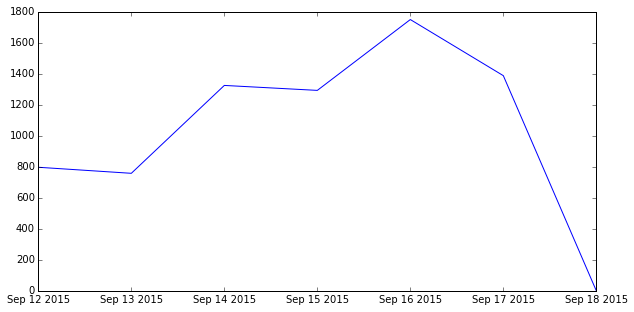

In [34]:
def TimeSeries(dates, counts):
    plt.figure(figsize=(10,5))
    plt.plot(dates, counts)
    
dates, counts = PlotbyDay(daily, list(daily.keys())[0])
TimeSeries(dates, counts)

**CHALLENGE 5**

In [35]:

def perSCPs(dictionary):
    scpDict = defaultdict()
    
    for k, lol in dictionary.items():
        newK = tuple(k[:2] + (k[3],))
        try:
            scpDict[newK] += lol
        except KeyError:
            # if there is no entry for this key, make one
            scpDict[newK] = lol
        
    scpDict = perDay(scpDict)
    
    return scpDict

SCPs = perSCPs(daily)


**CHALLENGE 6**

In [36]:
def perStations(dictionary):
    staDict = defaultdict()
    
    for k, lol in dictionary.items():
        newK = k[2]
        try:
            staDict[newK] += lol
        except KeyError:
            # if there is no entry for this key, make one
            staDict[newK] = lol
        
    staDict = perDay(staDict)
    
    return staDict

stations = perStations(SCPs)

**CHALLENGE 7**


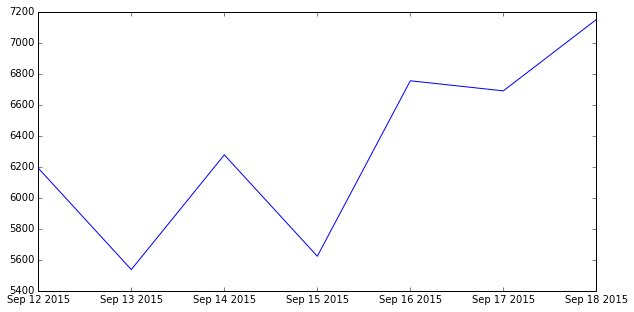

In [37]:
dates, counts = PlotbyDay(stations, list(stations.keys())[0])
TimeSeries(dates, counts)

**CHALLENGE 8**

In [38]:
def SplitWeekly(d, station):
    Weeklylist = []
    weekEntries = []
    
    for i, dataList in enumerate(sorted(d[station])):
        date = dataList[0]
        weekday = date.weekday()
        entries = dataList[1]
        
        if (i == 0) and (weekday != 6):  # If first item in list and weekday is NOT Sunday
            daysAhead = (7 + weekday) - 6
            for i in range(daysAhead):
                weekEntries.append(0)
        
        weekEntries.append(entries)
        
        if (weekday == 5):  # If NOT Sunday
            Weeklylist.append(weekEntries)
            weekEntries = []
        
    lastWeekLen = len(weekEntries)
    if lastWeekLen != 0:
        for i in range(7 - lastWeekLen):
            weekEntries.append(0)

    Weeklylist.append(weekEntries)
    
    return Weeklylist

weekls = SplitWeekly(stations, list(stations.keys())[0])

In [39]:
def WeekData(oneweek):
    # weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    weekdays = [x + 1 for x in range(7)]
    counts = oneweek
    return weekdays, counts

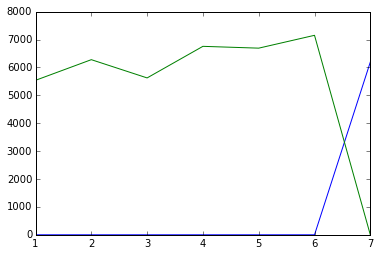

In [40]:
def RainbowWeek(weeklyLists):
    for week in weeklyLists:
        weekdays, counts = WeekData(week)
        plt.plot(weekdays, counts)
        
RainbowWeek(weekls)

**CHALLENGE 9**

In [41]:
def AllDations(d):
    return {k: sum([lst[1] for lst in LoLs]) for k, LoLs in d.items()}

alldatestation = sorted(AllDations(stations).items(), key=lambda x: x[1], reverse=1)


In [42]:
stationCount = len(alldatestation)
print alldatestation

[('RECTOR ST', 117010719), ('42 ST-PA BUS TE', 503426), ('34 ST-PENN STA', 501927), ('14 ST-UNION SQ', 467344), ('CANAL ST', 430773), ('59 ST-COLUMBUS', 341160), ('CHAMBERS ST', 286363), ('FULTON ST', 283268), ('W 4 ST-WASH SQ', 281108), ('JAY ST-METROTEC', 263598), ('8 AVE', 251873), ('34 ST-HERALD SQ', 234280), ('LEXINGTON-53 ST', 227957), ('MYRTLE AVE', 200458), ('DEKALB AVE', 189603), ('125 ST', 184697), ('BEDFORD AVE', 174499), ('23 ST', 156898), ('23 ST-5 AVE', 154402), ('86 ST', 153456), ('145 ST', 152015), ('1 AVE', 151879), ('50 ST', 148530), ('KINGS HIGHWAY', 147899), ('5 AVE-53 ST', 146195), ('49 ST-7 AVE', 138157), ('14 ST', 121871), ('5 AVE-59 ST', 116936), ("8 ST-B'WAY NYU", 115159), ('36 ST', 113517), ('CHURCH AVE', 113264), ('NOSTRAND AVE', 112054), ("PRINCE ST-B'WAY", 108132), ('LEXINGTON AVE', 101580), ('WHITEHALL ST', 101052), ('7 AVE-53 ST', 100232), ('UTICA AVE', 98568), ('STILLWELL AVE', 96822), ('WORLD TRADE CTR', 94067), ('HALSEY ST', 93512), ('57 ST-7 AVE', 913

**CHALLENGE 10**

(array([ 193.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ -7.84780000e+04,   1.16304417e+07,   2.33393614e+07,
          3.50482811e+07,   4.67572008e+07,   5.84661205e+07,
          7.01750402e+07,   8.18839599e+07,   9.35928796e+07,
          1.05301799e+08,   1.17010719e+08]),
 <a list of 10 Patch objects>)

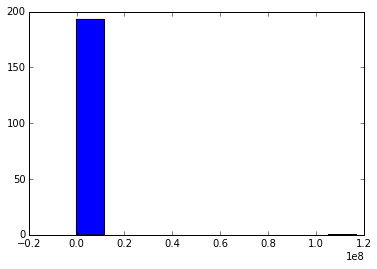

In [43]:
counts = [count for station, count in alldatestation]
plt.hist(counts)

<Container object of 194 artists>

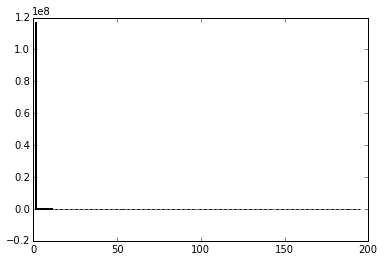

In [44]:
indices = range(1, len(counts) + 1)
plt.bar(indices, counts)